In [35]:
import qiskit

from qiskit import QuantumCircuit

from qiskit import transpile
from qiskit_aer import Aer

from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import math

# Chpt 3
## The Qubit and the Quantum States
### The first qubit
---

In [29]:

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Define initial_state as |1>
initial_state = [0, 1]

# Apply initialization operation to the qubit at position 0
qc.initialize(initial_state, 0)

In [11]:
# Tell qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')

# Do the simulation and return the result
new_circuit = transpile(qc, backend)

In [12]:
job = backend.run(new_circuit)

In [16]:
result = job.result()

In [17]:
# get the probability distribution
counts = result.get_counts()

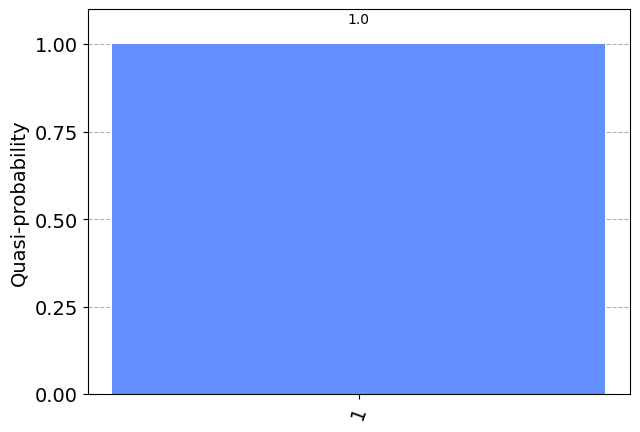

In [19]:
plot_histogram(counts)

### Super imposed states
----


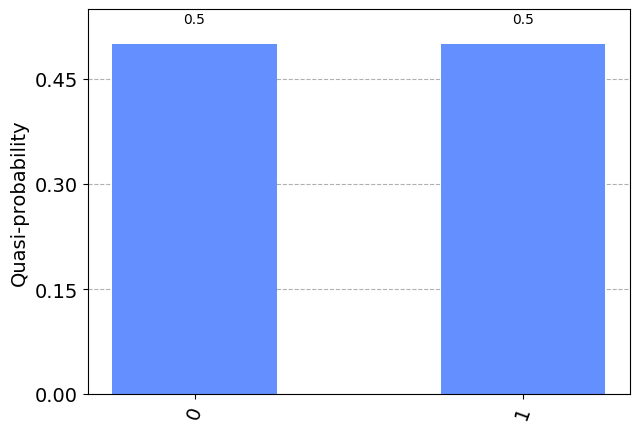

In [36]:
# Define state |psi> 
# BK: this is the state [1/sqrt(2),1/sqrt(2)] where you've added the two vectors for |0> and |1>
# together
initial_state = [1/math.sqrt(2), 1/math.sqrt(2)]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Intialize the 0th qubit in the state 'initial_state'
qc.initialize(initial_state, 0)

# execute the qc
new_circuit = transpile(qc, backend)
results = backend.run(new_circuit).result().get_counts()

plot_histogram(results)

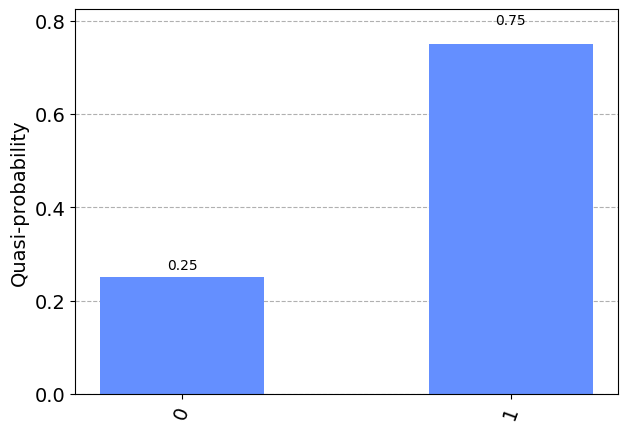

In [37]:
# Qubit with a probability of .25 for 0 or .75 for 1  
# BK: this is the state [1/2, sqrt(3)/2] where you've added the two vectors for |0> and |1>
# together
initial_state = [1/2, math.sqrt(3)/2]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Intialize the 0th qubit in the state 'initial_state'
qc.initialize(initial_state, 0)

# execute the qc
new_circuit = transpile(qc, backend)
results = backend.run(new_circuit).result().get_counts()

plot_histogram(results)

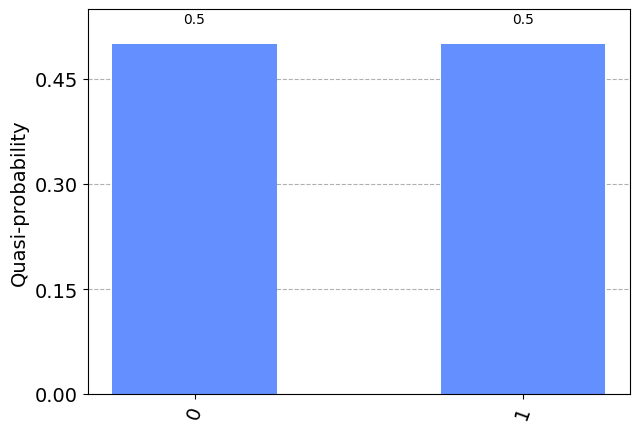

In [59]:
# Listing 3.8
# Using theta to specify the quantum state vector
# BK: alpha and beta are coefficients in the normalization scheme that describe
# how often each state is observed, the sum of which equals one.  In a qubit 
# representation these coefficients represent the arcs between the new state 
# vector in |0> + |1>.  These coefficients can then be described by theta,
# the angle in that new vector.

def get_state(theta):
    return [math.cos(theta / 2), math.sin(theta / 2)]

# play with the values for theta to get a feeling
theta = math.pi / 2

initial_state = get_state(theta)

qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
new_circuit = transpile(qc, backend)
results = backend.run(new_circuit).result().get_counts()

plot_histogram(results)

### Circuit with measurement
---

In [60]:
qc.draw(output='text')

┌─────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711) ├
   └─────────────────────────────┘

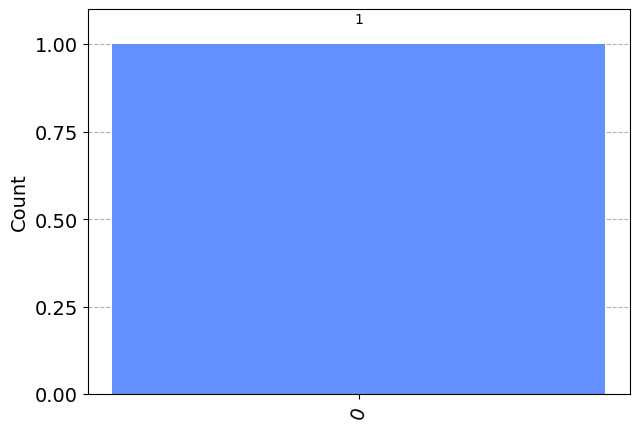

In [69]:
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
qc.measure_all()

new_circuit = transpile(qc, backend)
results = backend.run(new_circuit).result().get_counts()

plot_histogram(results)

In [70]:
qc.draw(output='text')

┌─────────────────────────────┐ ░ ┌─┐
     q: ┤ Initialize(0.70711,0.70711) ├─░─┤M├
        └─────────────────────────────┘ ░ └╥┘
meas: 1/═══════════════════════════════════╩═
                                           0

### Parameterized Quantum Circuit
---